# Tutorial 04, Intro to machine learning/pattern classification

## Machine learning, or pattern recognition, refers to a large set of tools that are used in many areas of science in any case where you are trying to use multiple measured variables to determine if information is encoded about different levels of an experimental manipulation. 
* To the extent that there is information in a pattern of measured responses, then the pattern recognition algorithm will be able to successfully assign different examplars into their correct classes.
* If there is no information, then it the pattern recognition algorithm will randomly guess and classifation accuracy will be at chance. 
* Note that the 'pattern' part of 'pattern recognition' refers to the fact that we're not just going to use a single variable to predict our outcome measure - we're going  to use the information encoded by a series of variables to make predictions (i.e. a 'multivariate' analysis).
* The multivariate nature of the method is a major advantage as you might infer a null relationship based on univariate methods when in fact there is a very robust relationship that can be revealed by exploiting information encoded in a pattern of measurements. 

<div class="alert alert-info">
Cross-validation: To assess the generalizability of a pattern classification algorithm. Cross-validation simply refers to the notion that you train your pattern recognition algorithm (henceforth I'll call this a 'classifer') using one set of data, and then you validate, or 'test', the performance of the classifier using a novel set of data that was not part of the training set. The main purpose of cross-validation is to assess the generalizability of your classifier and its ability to correctly categorize novel inputs.

This sounds simple but can be tricky...suppose you did an experiment that had 500 trials of stimulus type A and 500 trials of stimulus type B and you measured the response on each trial in 100 neurons. 

Then, to figure out how well the neural data respond systematically to changes in stimulus parameters, you  fit a multivariate regression analysis to see how much variability in the stimulus is accounted for by changes in neural activity (i.e. you compute something akin to a R^2 value to asses goodness of fit). Suppose you run this analysis on all 1,000 trials and you get your R^2 value and its nice and high - like .75 or so. You might be really happy with this, however, since you fit all of the data in your model, your estimate of how good the model fits the data is almost certainly overestimating how good the model is at accounting for the relationship between the two factors because your dependent variables  (your measured neural responses) are corrupted by noise, and this noise is idiosyncratic in the sense that if you were to perform the experiment again, you'd get 1000 different measurements that were similar to the first 1000, but corrupted by different noise. 

As a result, when you fit your model to the data, the resulting coeffecients will reflect the true 'signal' in the data AND the idiosyncratic noise that was measured along with the signal. In effect, your model learns the relationship between the independent variable and the (signal + noise). This occurs because your model has no a priori means of separating out signal and noise - it just gets a measure of neural responses that were evoked by each stimulus, and the model is just relating those measurements to the independent variables. This is referred to as 'overfitting', and is a exacerbated by small data sets (where the signal is not likely to emerge from the noise due to the small sample size) and when you have a model that has lots of free parameters (more free parameters means that the model can more flexibly account for random variations in the data...i.e. noise).  
So - what to do? Instead of fitting the model to all the data and assessing the goodness of fit, you could use cross-validation to estimate **prediction accuracy**. In our example above, you could train your classifer using 400/500 of the trials associated with each stimulus set (so 800 trials total), and then 'test' the classifer's performance at guessing the correct stimulus class using the remaining 200 trials (100 associated with each stimulus). 

Then you could permute this train/test procedure several times, each time holding-out a different set of 800 trials to train the classifer and 200 trials to test the performance of the classifier. Here is the cool part: if your model is just learning the idiosyncratic noise in the data, then you might have a reasonable looking R^2 value based on your training data (i.e. the model fits the training data ok), but your ability to classify novel examplars from the test set will be at chance becuase your model just learned the random noise in the training set and there was no consistent 'signal' that could actually discriminate between conditions. 

So, the use of cross-validation can protect against overly optimistic assessments of model fit due to 'overfitting', and also enables you to assess the generalizability of the model to classify novel exemplars. The degree to which a classifer generalizes to correctly predict novel stimuli is really  then a measure of how much real signal - or information - there is in your data about the different examplars that you're trying to classify.
</div>

## Import modules

In [13]:
import numpy as np
from scipy import stats  # has t-tests and other stats stuff...
from scipy.linalg import eigh
from scipy.stats import norm
import matplotlib.pyplot as plt

# also define the default font we'll use for figures. 
fig_font = {'fontname':'Arial', 'size':'20'}

## First lets set up some code to generate simulated data
* We'll set up a function to generate data from two variables that is correlated to a specified degree
* Can see why multivariate analyses are so powerful when comparing a N-D representation to a univariate representation
* In this example, we'll have two variables (e.g. neurons), and two experimental conditions
* We want to see if the pattern of responses across the two variables systematically varies across conditions
* [scipy cookbook for generating correlated samples](https://scipy-cookbook.readthedocs.io/items/CorrelatedRandomSamples.html)

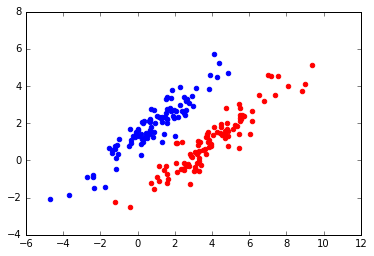

In [47]:
# number of data points in our simulated data
N = 100 

# number of variables, in this case lets start with 2 because that makes it easy to 
# visualize
V = 2

# means of each variable in each condition
mean_of_data0 = np.array([1,2])
mean_of_data1 = np.array([4,1])

# generate some random data vectors drawn from normal
data0 = np.random.randn(N,V) 
data1 = np.random.randn(N,V) 

# set up a covariance matrix - main diag is the variance of each and off-diags are the cov
# first do it for the responses in condition 1
cv_mat0 = np.array([
    [3.1, 3],
    [2.3, 2]
])

# for our second data set...
cv_mat1 = np.array([
    [2.1, 2.5],
    [2.1, 3.5]
])

# impose the covariance structure on the data

# first compute the eigenvalues and eigenvectors
evals, evecs = eigh(cv_mat)

# Construct c, so c*c^T = cv_mat.
c = np.dot(evecs, np.diag(np.sqrt(evals)))

# convert the data using by multiplying data by c
# to be consistent with previous tutorials, we want the data running down columns...so do the double .T
cdata0 = np.dot(c, data0.T).T + np.vstack((np.ones(N,)*mean_of_data0[0], np.ones(N,)*mean_of_data0[1])).T

cdata1 = np.dot(c, data1.T).T + np.vstack((np.ones(N,)*mean_of_data1[0], np.ones(N,)*mean_of_data1[1])).T  

# plot the data...
plt.scatter(cdata0[:,0], cdata0[:,1], color='b')
plt.scatter(cdata1[:,0], cdata1[:,1], color='r')
plt.show()

In [46]:
np.mean(data0, axis=0)

array([ 1.00874786,  1.88406453])

## now lets add another data set...

In [ ]:
% dprime = (mean1 - mean2)/(pooled estimate of noise across conditions)

% so classAcc will be proportional to d-prime in this univariate
% situation - moving the means farther apart (while holding noise constant)
% will lead to a larger dprime and also to better classification, and reducing the
% noise while holding the means constant will lead to responses that are
% clustered closer to their means, so they will overlap less and classAcc
% will be higher. This is an important link, because all of the
% classification algorithms that we'll use today - including the
% multivariate algorithms that are introduced below - are really just fancy
% versions of dprime. 

%% REVIEW: We just did classification using a single variable based on a single
% boundary point. The key notions to take away thus far are: (1) that the
% separation of the observations from each condition will influence
% classification accuracy, and (2) that we compute classification accuracy
% by figuring out which side of a boundary each data point in the test set
% falls on. This logic is all that you need to do pattern recognition in
% more complex scenarios! Its really only how you determine the boundary that
% changes as you add more variables. 


%% PART II: univariate vs multivarte classification
% In this section, we'll examine the advantage of multivariate vs univariate
% classification techniques. The pattern of measurements across many variables
% (multivariate) can reveal effects that can be missed if each variable
% is considered in isolation (univariate). To make this point, we'll set up
% two variables and examine the observations in each variable in response
% to condition A and condition B
clear all
close all

% number of observations in our simulated study - same as above
nObs = 200;
nObsCond = nObs/2;     % store the number of observations per condition for convenience later on

% NEW - number of variables that we're going to measure for conditions A
% and B. For this section of the tutorial, always set to 2 so that we can
% visualize more easily.
nv = 2; % number of variables

% response amplitude to conditions A and B for each of our variables
ampA = [1,2];       % response of each variable in condition A  %%%%randn(1, nv)
ampB = [2,1];       % response of each variable in condition B

% magnitude of independent identically distributed noise (IID noise)
n = .1;

% generate a set of responses evoked by each stimulus
% note the use of 'repmat' to replicate the ampA and ampB vectors so that
% we can add them to a [nObsCond, nv] matrix of noise
rA = repmat(ampA, nObsCond, 1)  + (n*randn(nObsCond, nv));    % set up a matrix that is nObsCond x num variables for cond A
rB = repmat(ampB, nObsCond, 1) + (n*randn(nObsCond, nv));     % same kind of matrix for cond B

% plot the data in variable 1 against the data in variable 2
figure(1), clf, hold on
plot(rA(:,1), rA(:,2), 'ro', 'MarkerSize', 10)
plot(rB(:,1), rB(:,2), 'bv', 'MarkerSize', 10)
set(gca, 'FontSize', 20)     
minData = min([rA(:);rB(:)]);           % for adjusting axes
maxData = max([rA(:);rB(:)]);
set(gca, 'XLim', [minData, maxData])    % plot on a scale that spans the range of the data
set(gca, 'YLim', [minData, maxData])    % plot on a scale that spans the range of the data
xlabel('Response variable 1')
ylabel('Response variable 2')
legend({'Cond A', 'Cond B'})

% now, instead of a point, we want to draw a line that best
% separates these classes. For now, we'll just draw a line that goes
% between the mean responses of each variable to condition A and condition
% B - in practice, figuring out how to draw this line depends on the
% pattern recognition algorithm that you actually use.
upperLineX = max([rA(:,1);rB(:,1)]);    % max x-value (max response in voxel 1 across conditions)
upperLineY = max([rA(:,2);rB(:,2)]);    % max y-value (max response in voxel 2 across conditions)
lowerLineX = min([rA(:,1);rB(:,1)]);    % min x
lowerLineY = min([rA(:,2);rB(:,2)]);    % min y
plot([lowerLineX, upperLineX], [lowerLineY, upperLineY], 'k', 'LineWidth', 2)


In [ ]:
% classify based on the response to each condition, collapsed across our
% two variables. To save space I've written a function to compute univariate
% classification accuracy - it does exactly what the 'for
% i=1:numPerms...end' loop does above. 

holdOut = nObsCond;         % as above, set to 1/2 of the data.
nPerms = 100;               % number of cross-validation 'folds' or permutations that we'll carry out to estimate classification accuracy
labels = [ones(nObsCond,1); ones(nObsCond,1)+1];  % this is a vector that tells us which condition a given observation belongs to - we'll use this to evaluate classification accuracy
data = [rA; rB];            % vertically concatenate the observations from each condition into a single data vector

% here is the function call that does what we wrote out in the tutorial
% above already. It should be right around chance (50%) classification
% accuracy, because we're discarding the pattern of responses across
% voxels. Furthermore, reducing the noise won't help either, because the
% expected mean response to each condition, averaged across voxels, is identical 
classAcc = uniClass(data, labels, holdOut, nPerms)

% Now lets actually consider the pattern of responses across voxels to see
% how well we can classify the data. Just by looking at the plot, it should
% be apparent that this should work pretty well. To start, we'll use a
% simple classifier based just on correlation coeffecients. We'll just
% correlate each vector in the test data set (a vector with just two values
% in it in this example) with the mean pattern across variables assoicated
% with condition A and the mean pattern across variables associated with
% condition B. To do this, we'll use another function that is identical to
% the uniClass function above, but this time it will use correlation
% coeffecients instead of univariate means.
classAcc = corrClass(data, labels, holdOut, nPerms)

In [ ]:
% an example of how correlated variables can make a big difference.

clear;
close all;
rng(0);
% number of observations in our simulated study - same as above
nObs = 1000;
nObsCond = nObs/2;     % store the number of observations per condition for convenience later on

% set up correlated responses. Sigma is the covariance matrix, where the
% diagnoal elements correspond to variance of each response, and the off
% diagonal elements correspond to the covariance betweeen variables

% generate responses in two voxels to condition A
ampA = [2 4]; Sigma = [2 1.5; 1.5 2];
rA = mvnrnd(ampA, Sigma, nObsCond);

% responses in two voxels for condition B
ampB = [2 1]; Sigma = [2 1.5; 1.5 2];
rB = mvnrnd(ampB, Sigma, nObsCond);

% plot the data in variable 1 against the data in variable 2
figure(1), clf, hold on
plot(rA(:,1), rA(:,2), 'ro', 'MarkerSize', 10)
plot(rB(:,1), rB(:,2), 'bv', 'MarkerSize', 10)
set(gca, 'FontSize', 20)     
minData = min([rA(:);rB(:)]);           % for adjusting axes
maxData = max([rA(:);rB(:)]);
set(gca, 'XLim', [minData, maxData])    % plot on a scale that spans the range of the data
set(gca, 'YLim', [minData, maxData])    % plot on a scale that spans the range of the data
xlabel('Response variable 1')
ylabel('Response variable 2')
legend({'Cond A', 'Cond B'})

data = [rA; rB];
labels = [ones(size(rA,1),1); ones(size(rB,1),1)+1];

classAcc = normEucClass(data, labels, 100, 100)
classAcc = mahaClass(data, labels, 100, 100)

In [ ]:
%% quick demo of what incorporating the covariance does - "Maha whitening"
clear
close all
% quick demo of what accounting for cov does for maha distance based
% calculations
mu = [2,3];
sigma = [1,1.5;1.5,3];
data = mvnrnd(mu,sigma,100);

figure(1)
scatter(data(:,1), data(:,2));
xlabel('response in var 1')
ylabel('response in var 2')
set(gca, 'FontSize', 24)

% estimate cov matrix
cm = cov(data);

% whiten data by multiplying by inverse of covariance matrix
data_cm = data * inv(sqrtm(cm));
               
% replot...notice that the correlations are gone!
figure(2)
scatter(data_cm(:,1), data_cm(:,2));
xlabel('response in var 1')
ylabel('response in var 2')
set(gca, 'FontSize', 24)

In [ ]:
%% significance testing...permute labels...
clear
close all

% number of observations in our simulated study - same as above
nObs = 200;
nObsCond = nObs/2;     % store the number of observations per condition for convenience later on

nv = 2; % number of variables

% response amplitude to conditions A and B for each of our variables
ampA = [1,1.5];       % response of each variable in condition A  %%%%randn(1, nv)
ampB = [1.5,1];       % response of each variable in condition B

% magnitude of independent identically distributed noise (IID noise)
n1 = 2.5;
n2 = 2.5;

% generate a set of responses evoked by each stimulus
rA = repmat(ampA, nObsCond, 1)  + (n1*randn(nObsCond, nv));    % set up a matrix that is nObsCond x num variables for cond A
rB = repmat(ampB, nObsCond, 1) + (n2*randn(nObsCond, nv));     % same kind of matrix for cond B

holdOut = nObsCond;         % as above, set to 1/2 of the data.
nPerms = 100;               % number of cross-validation 'folds' or permutations that we'll carry out to estimate classification accuracy
labels = [ones(nObsCond,1); ones(nObsCond,1)+1];  % this is a vector that tells us which condition a given observation belongs to - we'll use this to evaluate classification accuracy
data = [rA; rB];   

% do the classification
classAcc = mahaClass(data, labels, 100, 100)

for j = 1:100
    newLabel = labels(randperm(numel(labels)));
    newAcc(j) = mahaClass(data, newLabel, 100, 100);
end

p = 1-numel(find(classAcc>newAcc))/numel(newAcc)

p = 1-numel(find(.51>newAcc))/numel(newAcc)